<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/sem05_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAP: class 5_numpy


___

## План на сегодня:

* NumPy
* joins

___

## NumPy

**NumPy** — библиотека языка Python, позволяющая (удобно) работать с многомерными массивами и матрицами. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)
 
Кстати, про NumPy относительно недавно вышла [публикация](https://www.nature.com/articles/s41586-020-2649-2) в Nature.

In [ ]:
!pip3 install numpy 
# устанавливаем библиотеку, если работаем локально на собственных компьютерах

# в Colab-e это не нужно, большинство библиотек тут уже предустановлено

In [ ]:
import numpy as np 
# переименовываем то, как к нему кратко обращаться, 
# чтобы использовать его функции и методы (так можно сделать с любым модулем)

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси. Многомерные массивы имеют 3 и более осей (например, тензоры).

In [ ]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

In [ ]:
# можно указать желаемый тип
vec_str = np.array([10, 100, 10000, 1], dtype=str)
print(vec_str)
vec_str[0] = 1000000 
# заметьте как мы обновляем элемент числом, но в массиве он становится строкой, так как у массива мы указали тип элементов
print(vec_str)

In [ ]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [ ]:
vec.shape

Чтобы узнать тип элементов и их размер в байтах:

In [ ]:
mat.dtype.name

In [ ]:
mat.itemsize

In [ ]:
# многомерные массивы
tens = np.array([[[1, 2], [3, 4]], [[1, 2], [3, 4]]]) 
print(tens, tens.ndim, tens.shape, sep='\n')

#### Создание массивов

Есть несколько способов сформировать массив в NumPy:

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [ ]:
A = np.array([1, 2, 3])
A, A.dtype

In [ ]:
A = np.array([1, 2, 3], dtype=float)
A, A.dtype

* Воспользоваться функциями zeros, ones, empty, identity, full если вам нужен объект специального вида:

In [ ]:
np.zeros((3,))

In [ ]:
np.ones((3, 4))

In [ ]:
np.empty((2,3)) 
# заполняется "какими-то" числами, предполагается использовать 
# такой массив, чтобы потом туда вставлять необходимые значения

In [ ]:
np.identity(3)

In [ ]:
np.full((2,3,4), 8)

* Воспользоваться функциями arange (в качестве параметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**) для формирования последовательностей:

In [ ]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

In [ ]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

In [ ]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

* Изменить размеры существующего массива с помощью reshape (при этом количество элементов должно оставаться неизменным):

In [ ]:
np.arange(9).reshape(3, 3)

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [ ]:
np.arange(8).reshape(2, -1)

* Транспонировать существующий массив:

In [ ]:
C = np.arange(6).reshape(2, -1)
C

In [ ]:
C.T

* Повторить существующий массив:

In [ ]:
a = np.arange(3)
np.tile(a, (2, 2))

In [ ]:
np.tile(a, (4, 1))

- Превратить многомерный массив в вектор:

In [ ]:
tens = np.arange(8).reshape(2,2,2)
line = tens.flatten()
tens.shape, line, line.shape

* С помощью функции ```np.logspace``` создать массив из равноудаленных элементов в логарифмической шкале

In [ ]:
np.logspace(2, 5, num=10, base=2, dtype=int) # 10 ~равноудаленных целых чисел от 2^2 до 5^2

* С помощью функции ``np.linspace`` создать массив из равноудаленных элементов в линейной шкале

In [ ]:
np.linspace(10, 100, 3)

#### Random
[Сабмодуль ```np.random```](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html) позволяет создавать массивы с элементами из вероятностных распределений. Создадим следующие массивы:
1. Массив из 10 случайных чисел из $U([0,1))$ (равномерное распределение на полуотрезке [0, 1))
2. Массив 3х5 случайных чисел из $\mathcal{N}(0,1)$ (стандартное нормальное распределение)
3. Массив из случайных целых чисел от 0 до 10 размером 15
4. Массив из случайной подвыборки чисел от 0 до 20 размером 15 (то же что 3, но без повторений)


In [ ]:
np.random.random((10,))

In [ ]:
np.random.randn(3, 5)

In [ ]:
np.random.randint(0, 10, size=(15,))

In [ ]:
np.random.choice(np.arange(0, 20), size=(15,), replace=False)

### Обработка массивов

С помощью `np.where` для случайного вектора вернем вектор, где отрицательные элементы заменены 0.

In [ ]:
a = np.random.randn(5) * 4 - 1
a, np.where(a > 0, a, 0) 
# также третьим аргументом можно подать массив того же размера, 
# тогда заменятся элементы не соответсвующие условию будут заменяться соответствующими занчениями

С помощью `np.clip` можно ограничить значения массива (снизу и/или сверху):

In [ ]:
np.clip(a, 0, 1)

С помощью `np.vstack` и `np.hstack` можно "стакать" (stack - укладывать/накладывать друг на друга) массивы по вертикали и по горизонтали:

In [ ]:
a, b = np.full((2, 3), 1), np.full((3, 2), 2)
# тут важно чтобы одна из осей по которой мы стакаем у обоих массивов была одинаковая
print(np.vstack([a, b.T]), '\n')
print(np.hstack([a.T, b]))

С помощью `np.unique` можно составить массив, в котором первый столбец - уникальные значения вектора, а второй столбец соответсвует тому сколько раз соответственный элемент первого столбца встретился в векторе.

In [ ]:
a = np.random.randint(-2, 2, 20)
print(a, '\n')
elements, frequency = np.unique(a, return_counts=True)
print(elements, '\n')
print(frequency)

#### Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [ ]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [ ]:
print(A)
print(B)

In [ ]:
A + B

In [ ]:
A * 1.0 / B

In [ ]:
A + 1

In [ ]:
3 * A

In [ ]:
A ** 2

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [ ]:
A * B

Для выполнения матричного умножения необходимо использовать функцию dot:

In [ ]:
A.dot(B)

Для умножения векторов или матриц можно также использовать оператор `@`:

In [ ]:
A @ B

In [ ]:
np.array([1, 2, 3, 4]) @ np.array([1, 1, 1, 1])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. 

Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):


![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [ ]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [ ]:
A

In [ ]:
A.min()

In [ ]:
A.max(axis=1)

In [ ]:
A.sum(axis=1)

Понять и научиться классно использовать эту главную особенность библиотекм - искусство! И только с опытом (сыном ошибок трудных) можно овладеть данным навыком. 

#### Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [ ]:
a = np.arange(10)
a

In [ ]:
a[2:5]

In [ ]:
a[3:8:2]

In [ ]:
A = np.arange(81).reshape(9, -1)
A

In [ ]:
A[2:4]

In [ ]:
A[:, 2:4]

In [ ]:
A[2:4, 2:4]

In [ ]:
A[-1]

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [ ]:
A = np.arange(81).reshape(9, -1)
A

In [ ]:
A[[2, 4, 5], [0, 1, 3]]

* Может применяться логическая индексация (при помощи логических массивов):

In [ ]:
A = np.arange(11)
A

In [ ]:
A[A % 5 != 3]

In [ ]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

#### Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать скалярное произведение 2 больших векторов:

In [ ]:
SIZE = 10000000

A_quick_arr = np.random.normal(size = (SIZE,))
B_quick_arr = np.random.normal(size = (SIZE,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [ ]:
%%time
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]

In [ ]:
%%time
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(SIZE)])

In [ ]:
%%time
ans = np.sum(A_quick_arr * B_quick_arr)

In [ ]:
%%time
ans = A_quick_arr.dot(B_quick_arr)

NumPy работает быстро по нескольким причинам:
* Массивы хранятся в непрерывном участке памяти, а все элементы имеют один и тот же тип
* Для вычислений по возможности используются библиотеки линейной алгебры вроде BLAS

Посмотреть, какая библиотека используется у вас, можно в конфигурации NumPy:

In [ ]:
print(np.show_config())

### Примеры векторизации вычислений на NumPy


Разберём несколько задач (из [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)), где NumPy может существенно ускорить вычисления и упростить код.

Дан четырёхмерный массив. Как получить двумерный массив, в котором элемент с индексами $(i, j)$ содержит сумму всех элементов исходного массива, у которых первые два индекса — это $(i, j)$?

In [ ]:
A = np.random.randint(0,1000,(2,5,20,25))
res = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print(res)

Даны одномерные массивы A и B. Элементы массива B принимают значения от 0 до `len(A) - 1`. Требуется прибавить единицу ко всем элементам A, чьи индексы записаны в B. Если индекс встречается в B несколько раз, то надо прибавить единицу для каждого такого вхождения.

In [ ]:
A = np.ones(10)
B = np.random.randint(0,len(A),20)
print(A)
print(B)
A += np.bincount(B, minlength=len(A))
print(A)

Даны одномерный массив A и число n. Вычислите массив B, в котором i-й элемент равен среднему значению элементов с i-го по (i+n-1)-й в массиве A.

In [ ]:
def moving_average(Z, n=3) :
    ret = np.cumsum(Z, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
A = np.random.randint(0, 10, 20)
print(A)
print(moving_average(A, n=3))

### Про джойны

Таблица - совокупность из матрицы, названий строк (индексы), названий колонок 

In [ ]:
X = np.arange(15)
X.resize((5,3))
df = pd.DataFrame(X)
df.columns = ['a', 'b', 'c']
df.index = ['z', 'y', 'x', 'x', 'v']
df

In [ ]:
df.values

In [ ]:
df.index.values

In [ ]:
df.columns.values

In [ ]:
dg = pd.DataFrame({'d': [5,5,6], 'e': [4,6,6]})
dg.index = ['x','u','x']
dg

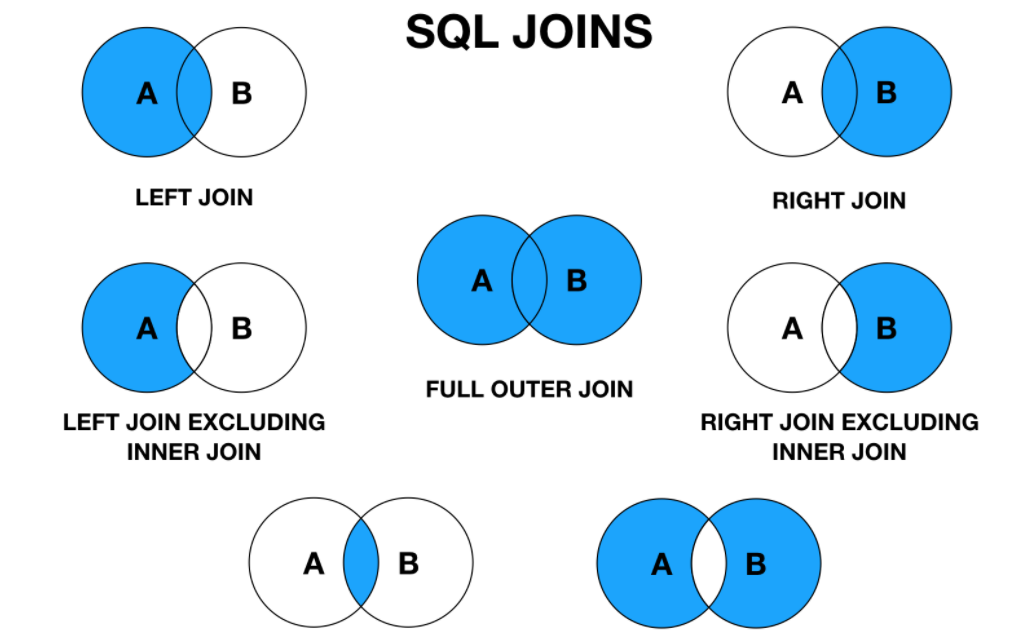

A = {1,2}
B = {3,4,5}
A x B = {(1,3),(1,4),(1,5), (2,3), ...}

In [ ]:
# Если индексы встречаются одинаковые, 
# он будет искать декартово произведение
df.join(dg) # left join

In [ ]:
df.join(dg, how='right') # right join

In [ ]:
df.join(dg, how='inner')

In [ ]:
df.join(dg, how='outer')

## Время приключений! (заданий)

![](https://media.giphy.com/media/fm4WhPMzu9hRK/giphy.gif)

**Задача 1. Матрица**

- https://rusvectores.org/ru/calculator/#
- матрица $X$ 
- вектор $v$ 
- найти в матрице $X$ строку, которая ближе всего к $v$ 

$$
||x|| = \sqrt{\sum_{i=1}^n x^2_i}
$$

In [ ]:
# код

**Задача 2. Нормирование** 

Отнормировать столбцы к отрезку [0;1].


In [ ]:
# код

**Задача 3. Игральная кость** 


- кость игральная $<3$, мы получаем 1 2 3 рубля от другого человека
- выпало $>3$, мы платим 1 2 3 рубля другому человеку 

Хотим ли мы играть в эту игру? 

$$
E(X) = \frac{1}{6} \cdot 1 +  \frac{1}{6} \cdot 2 + \ldots +  \frac{1}{6} \cdot 5 +  \frac{1}{6} \cdot 6 = 3.5
$$

$$
\bar{x} \to E(X)
$$

В какую игру играть невыгодно?

- если среднее меньше 3 => платят нам 
- если среднее больше 3 => платим мы 

In [ ]:
# код